In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retaildf=pd.read_excel("Online Retail.xlsx")

In [3]:
retaildf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Checking the Datatypes of the columns

retaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Unique country in the Dataframe

retaildf.Country.nunique()

38

In [6]:
#List of the country in the Dataframe

retaildf.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
#Missing Values in the Dataframe

print(retaildf.isna().sum().sort_values(ascending=False))

print('<------------>')

print(retaildf.count())

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64
<------------>
InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [8]:
#Dropping the Null value from the dataframe

retaildf.dropna(inplace=True)

In [9]:
#After dropping the Missing Value

print(retaildf.count())

print('<------------->')

print(retaildf.isna().sum().sort_values(ascending=False))

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64
<------------->
Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64


In [10]:
#Orders which are cancelled

retailcdf=retaildf[retaildf.InvoiceNo.str.contains("C", na=False)]
print(retailcdf.head())

print('<----Seperator---->')

print(retailcdf.count())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
<----Seperator---->
InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dty

In [11]:
#understanding the data

retaildf.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [12]:
#Finding the quantity which are in negative
#By understanding the data we found that all cancelled invoice having negative quantity

print(retaildf[(retaildf.Quantity < 0)].head())

print('<-------------->')

print(retaildf[(retaildf.Quantity < 0)].count())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
<-------------->
InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype:

In [13]:
#Numbers of orders which are cancelled

retaildf[retaildf.InvoiceNo.str.contains("C",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [14]:
#The quantity which are negative is for the cancelled Invoice,removing the negative quantity

retailfdf = retaildf[~(retaildf['Quantity'] < 0)]

In [15]:
#Checking the Dataset again

retailfdf.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [16]:
# Top 5 Highest number of orders by the Customer Id

retailfdf.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(5)

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
Name: InvoiceNo, dtype: int64

In [17]:
#Top 5 countries with most number of orders

retailfdf['Country'].value_counts().head()

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

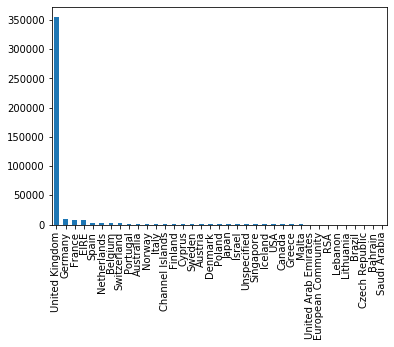

In [18]:
#Plot of Top 5 countries with most number of orders

retailfdf['Country'].value_counts().plot.bar()

In [19]:
#Top 5 countries with highest money spent

retaildf.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).head()

Country
United Kingdom    1.178277e+06
France            4.287124e+04
EIRE              3.825358e+04
Germany           3.766600e+04
Singapore         2.510889e+04
Name: UnitPrice, dtype: float64

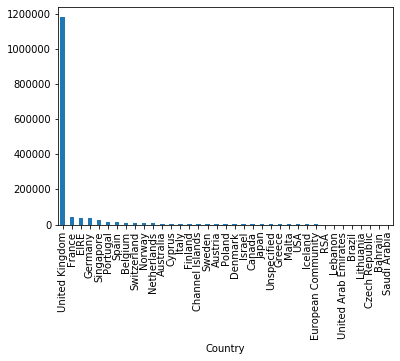

In [20]:
# Plot of Top 5 countries with highest money spent
retaildf.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).plot.bar()

In [21]:
def top_seller_item_of_country(country):
    retailfdf_order_country=retaildf[retaildf['Country']==country]
    stock_quantity_purchased=retailfdf_order_country.groupby('StockCode')['Quantity'].sum().reset_index()
    stock_quantity_purchased_sort=stock_quantity_purchased.sort_values('Quantity',ascending=False).reset_index().head(10)
    top_seller_stocks=stock_quantity_purchased_sort['StockCode'].head(10).tolist()
    stock_top_df=retailfdf[['StockCode','Description']]
    top_seller=stock_top_df[stock_top_df['StockCode'].isin(top_seller_stocks)]
    top_seller_list=top_seller.groupby(['StockCode','Description'])
    return(top_seller_list.count())
#top_seller_item_of_country('United Kingdom')

In [22]:
top_seller_item_of_country_wise=top_seller_item_of_country(input())
top_seller_item_of_country_wise

Germany


,
StockCode,Description
15036,ASSORTED COLOURS SILK FAN
16045,POPART WOODEN PENCILS ASST
20719,WOODLAND CHARLOTTE BAG
21212,PACK OF 72 RETROSPOT CAKE CASES
22326,ROUND SNACK BOXES SET OF4 WOODLAND
22554,PLASTERS IN TIN WOODLAND ANIMALS
22585,PACK OF 6 BIRDY GIFT TAGS
22629,SPACEBOY LUNCH BOX
22961,JAM MAKING SET PRINTED


# User Collaberative Filtering

As Discussed Taking for One Country--> Norway

In [84]:
retaildf.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [24]:
df_user = retaildf[retaildf['Country']=='Norway']

In [25]:
df_user.shape

(1086, 8)

In [86]:
df_user.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,1236,536532,557,BOX OF 24 COCKTAIL PARASOLS,50,2010-12-01 13:24:00,0.42,12433.0,Norway,21.00
1,1237,536532,218,GROW YOUR OWN PLANT IN A CAN,96,2010-12-01 13:24:00,1.06,12433.0,Norway,101.76
2,1238,536532,345,CHILDREN'S APRON DOLLY GIRL,8,2010-12-01 13:24:00,2.10,12433.0,Norway,16.80
3,1239,536532,50,RETROSPOT CHILDRENS APRON,8,2010-12-01 13:24:00,1.95,12433.0,Norway,15.60
4,1240,536532,245,PLASTERS IN TIN CIRCUS PARADE,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60


In [28]:
df_norway_mdata=pd.DataFrame()

In [29]:
retaildf["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [30]:
df_norway_mdata["ID"]=retaildf["CustomerID"].unique()

In [31]:
df_norway_mdata["ID"].head()

0    17850.0
1    13047.0
2    12583.0
3    13748.0
4    15100.0
Name: ID, dtype: float64

In [32]:
df_user.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1236,536532,84692,BOX OF 24 COCKTAIL PARASOLS,50,2010-12-01 13:24:00,0.42,12433.0,Norway
1237,536532,22444,GROW YOUR OWN PLANT IN A CAN,96,2010-12-01 13:24:00,1.06,12433.0,Norway
1238,536532,22899,CHILDREN'S APRON DOLLY GIRL,8,2010-12-01 13:24:00,2.10,12433.0,Norway
1239,536532,21156,RETROSPOT CHILDRENS APRON,8,2010-12-01 13:24:00,1.95,12433.0,Norway
1240,536532,22556,PLASTERS IN TIN CIRCUS PARADE,24,2010-12-01 13:24:00,1.65,12433.0,Norway


In [34]:
df_user.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [36]:
df_user['Sales']=df_user['Quantity']*df_user['UnitPrice']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_user.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
1236,536532,84692,BOX OF 24 COCKTAIL PARASOLS,50,2010-12-01 13:24:00,0.42,12433.0,Norway,21.00
1237,536532,22444,GROW YOUR OWN PLANT IN A CAN,96,2010-12-01 13:24:00,1.06,12433.0,Norway,101.76
1238,536532,22899,CHILDREN'S APRON DOLLY GIRL,8,2010-12-01 13:24:00,2.10,12433.0,Norway,16.80
1239,536532,21156,RETROSPOT CHILDRENS APRON,8,2010-12-01 13:24:00,1.95,12433.0,Norway,15.60
1240,536532,22556,PLASTERS IN TIN CIRCUS PARADE,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60
1241,536532,22555,PLASTERS IN TIN STRONGMAN,36,2010-12-01 13:24:00,1.65,12433.0,Norway,59.40
1242,536532,22554,PLASTERS IN TIN WOODLAND ANIMALS,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60
1243,536532,22553,PLASTERS IN TIN SKULLS,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60
1244,536532,22551,PLASTERS IN TIN SPACEBOY,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60
1245,536532,22547,MINI JIGSAW DINOSAUR,24,2010-12-01 13:24:00,0.42,12433.0,Norway,10.08


In [39]:
df_user['StockCode']=df_user["StockCode"].astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [42]:
df_user['StockCode']= le.fit_transform(df_user['StockCode'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_user.dtypes

InvoiceNo              object
StockCode               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Sales                 float64
dtype: object

In [44]:
df_user.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
1236,536532,557,BOX OF 24 COCKTAIL PARASOLS,50,2010-12-01 13:24:00,0.42,12433.0,Norway,21.00
1237,536532,218,GROW YOUR OWN PLANT IN A CAN,96,2010-12-01 13:24:00,1.06,12433.0,Norway,101.76
1238,536532,345,CHILDREN'S APRON DOLLY GIRL,8,2010-12-01 13:24:00,2.10,12433.0,Norway,16.80
1239,536532,50,RETROSPOT CHILDRENS APRON,8,2010-12-01 13:24:00,1.95,12433.0,Norway,15.60
1240,536532,245,PLASTERS IN TIN CIRCUS PARADE,24,2010-12-01 13:24:00,1.65,12433.0,Norway,39.60


In [45]:
df_user.reset_index(inplace = True)

In [46]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 10 columns):
index          1086 non-null int64
InvoiceNo      1086 non-null object
StockCode      1086 non-null int64
Description    1086 non-null object
Quantity       1086 non-null int64
InvoiceDate    1086 non-null datetime64[ns]
UnitPrice      1086 non-null float64
CustomerID     1086 non-null float64
Country        1086 non-null object
Sales          1086 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 84.9+ KB


In [59]:
pivot_ratings = df_user.pivot_table(values = 'Sales', index = 'CustomerID', columns = 'StockCode')
pivot_ratings = pivot_ratings.fillna(0)

In [60]:
pivot_ratings

StockCode,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
CustomerID,,,,,,,,,,,,,,,,,,,,,
12350.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
12352.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,9.473903e-15,56.0
12381.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,23.4,0.0,0.0,10.725,0.0,0.0,0.0,0.00,0.000000e+00,74.1
12430.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
12432.0,0.0,0.00,0.0,0.00,0.00,0.00,47.7,0.0,0.00,0.0,...,70.2,0.0,0.0,0.000,45.0,45.0,0.0,0.00,0.000000e+00,700.0
12433.0,0.0,0.00,8.4,39.84,53.55,124.95,0.0,30.0,17.28,19.6,...,0.0,30.6,63.3,0.000,0.0,0.0,0.0,102.00,0.000000e+00,0.0
12436.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,80.0
12438.0,12.5,27.04,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,220.0
12444.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,23.4,0.0,0.0,0.000,0.0,0.0,10.2,14.85,0.000000e+00,230.0


In [61]:
pivot_ratings.reset_index(inplace = True)

In [63]:
pivot_ratings=pivot_ratings[pivot_ratings["CustomerID"].isin(df_norway_mdata["ID"])]

In [65]:
pivot_ratings.reset_index(inplace =True ,drop= True)

In [66]:
pivot_ratings

StockCode,CustomerID,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,590
0,12350.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
1,12352.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,9.473903e-15,56.0
2,12381.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,23.4,0.0,0.0,10.725,0.0,0.0,0.0,0.00,0.000000e+00,74.1
3,12430.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
4,12432.0,0.0,0.00,0.0,0.00,0.00,0.00,47.7,0.0,0.00,...,70.2,0.0,0.0,0.000,45.0,45.0,0.0,0.00,0.000000e+00,700.0
5,12433.0,0.0,0.00,8.4,39.84,53.55,124.95,0.0,30.0,17.28,...,0.0,30.6,63.3,0.000,0.0,0.0,0.0,102.00,0.000000e+00,0.0
6,12436.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,80.0
7,12438.0,12.5,27.04,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,220.0
8,12444.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,23.4,0.0,0.0,0.000,0.0,0.0,10.2,14.85,0.000000e+00,230.0
9,12752.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,0.0


In [67]:
pivot_ratings.rename(index={"StockCode":"index"},inplace =True)

In [69]:
pivot_ratings_StockCode = pivot_ratings.copy()

In [70]:
pivot_ratings_StockCode

StockCode,CustomerID,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,590
0,12350.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
1,12352.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,9.473903e-15,56.0
2,12381.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,23.4,0.0,0.0,10.725,0.0,0.0,0.0,0.00,0.000000e+00,74.1
3,12430.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,40.0
4,12432.0,0.0,0.00,0.0,0.00,0.00,0.00,47.7,0.0,0.00,...,70.2,0.0,0.0,0.000,45.0,45.0,0.0,0.00,0.000000e+00,700.0
5,12433.0,0.0,0.00,8.4,39.84,53.55,124.95,0.0,30.0,17.28,...,0.0,30.6,63.3,0.000,0.0,0.0,0.0,102.00,0.000000e+00,0.0
6,12436.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,80.0
7,12438.0,12.5,27.04,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,220.0
8,12444.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,23.4,0.0,0.0,0.000,0.0,0.0,10.2,14.85,0.000000e+00,230.0
9,12752.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000000e+00,0.0


In [71]:
pivot_ratings.reset_index(inplace = True, drop = True)

In [73]:
from scipy.sparse import csr_matrix

ratings_sparse = csr_matrix(pivot_ratings.values)

In [74]:
query_index = np.random.choice(pivot_ratings.shape[0])

In [76]:
print(pivot_ratings.shape[0])
print(query_index)

10
7


In [78]:
#Using NearestNeighbors to get the identical users and using Cosine Metrics
from sklearn.neighbors import NearestNeighbors
df_cbf = NearestNeighbors(metric='cosine', algorithm='auto')
df_cbf.fit(ratings_sparse)
df_cbf

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [80]:
distances, indices = df_cbf.kneighbors(pivot_ratings.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)
recommendations = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Check combined output')
    else:
        recommendations.append(retaildf[pivot_ratings_StockCode ==\
                                pivot_ratings_StockCode[pivot_ratings_StockCode.index == indices.flatten()[i]].CustomerID.values[0]]
                                )

Check combined output


In [89]:
recommendations

[       InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
 0            NaN       NaN         NaN       NaN         NaT        NaN   
 1            NaN       NaN         NaN       NaN         NaT        NaN   
 2            NaN       NaN         NaN       NaN         NaT        NaN   
 3            NaN       NaN         NaN       NaN         NaT        NaN   
 4            NaN       NaN         NaN       NaN         NaT        NaN   
 5            NaN       NaN         NaN       NaN         NaT        NaN   
 6            NaN       NaN         NaN       NaN         NaT        NaN   
 7            NaN       NaN         NaN       NaN         NaT        NaN   
 8            NaN       NaN         NaN       NaN         NaT        NaN   
 9            NaN       NaN         NaN       NaN         NaT        NaN   
 10           NaN       NaN         NaN       NaN         NaT        NaN   
 11           NaN       NaN         NaN       NaN         NaT        NaN   
 12         